In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from datetime import date

In [2]:
from IPython.display import Image

In [3]:
!pwd

/Users/andrenovikov/Documents/Repos/IronAndre/Week 1


In [4]:
custmark = pd.read_csv('/Users/andrenovikov/Documents/Repos/IronAndre/Week 1/Customer Analysis/marketing_customer_analysis.csv')

# Describe the data frame

The data frame includes car insurance data relevant for marketing purposes.

It includes 9134 instances of marketing leads that are evaluated along 24 different attribuets (columns).

In [5]:
response = custmark.describe()
response

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
custmark.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
custmark.shape

(9134, 24)

All instances (rows) across all attributes include an entry. That is, there are no null values in the entire data frame.

In [8]:
custmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

8 of the 24 attributes are numeric, which makes sense for the chosen categories.

The remainder of the attributes are categorical out of which effective to date is classified as an object-type, but for the purpose of analysis will be converted into a date type in this case.

In [9]:
custmark._get_numeric_data()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [10]:
custmark['Effective To Date'] = pd.to_datetime(custmark['Effective To Date'], errors = 'coerce')

In [11]:
custmark.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

## Response rate

- Less than 15% of total claims have been approved by the insurance company

<AxesSubplot:>

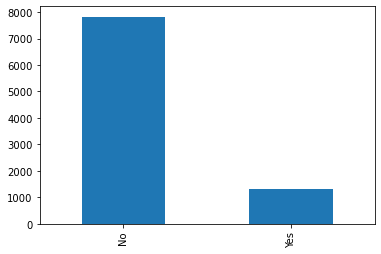

In [12]:
custmark['Response'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Response'>

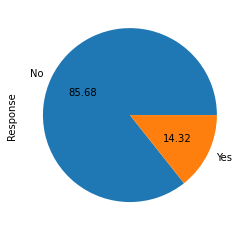

In [13]:
custmark['Response'].value_counts().plot(kind='pie', autopct='%.2f')

## Responses by sales channel

- It seems that physical sales channels have a higher proprtion of accepted claims (Agents and Branches)

array([<AxesSubplot:title={'center':'No'}>,
       <AxesSubplot:title={'center':'Yes'}>], dtype=object)

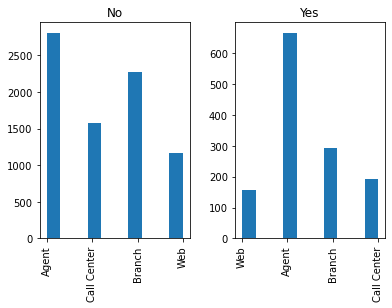

In [14]:
custmark.hist(by='Response', column='Sales Channel')

<AxesSubplot:xlabel='Sales Channel', ylabel='Count'>

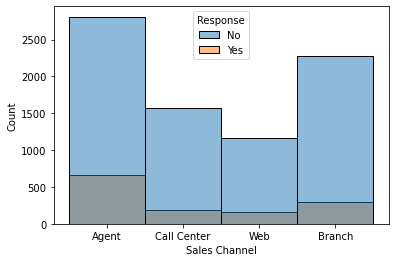

In [15]:
sns.histplot(data=custmark, x="Sales Channel", hue="Response")

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Count'>

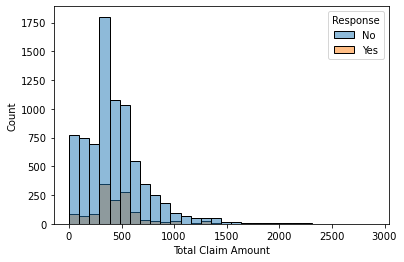

In [16]:
sns.histplot(data=custmark, x="Total Claim Amount", hue="Response", bins = 30)

## Responses by total claim amount

- It seems that most high-value claims have been rejected by the company
- No claim higher than 1500 USD has been accepted by the insurance company

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Response'>

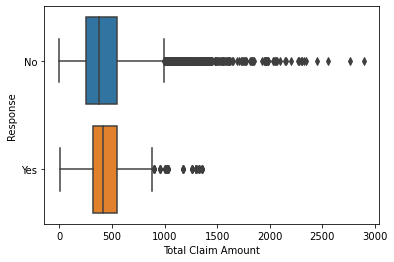

In [17]:
sns.boxplot(data = custmark, x="Total Claim Amount", y="Response")

## Responses by income

- There seems to be no discrimination according to income class
- Yes and No seem to be relatively even distributed across income

<AxesSubplot:xlabel='Income', ylabel='Count'>

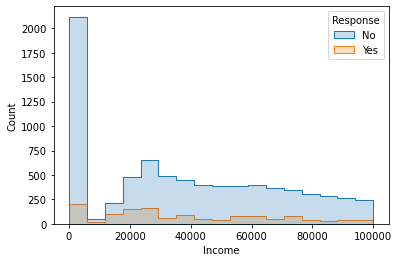

In [19]:
sns.histplot(data = custmark, x="Income", hue="Response", element="step")

## Scatterplot between income and claim amount

- Looking at the scatterplot the distribution between total claim amounts and income seems to be fairly random.

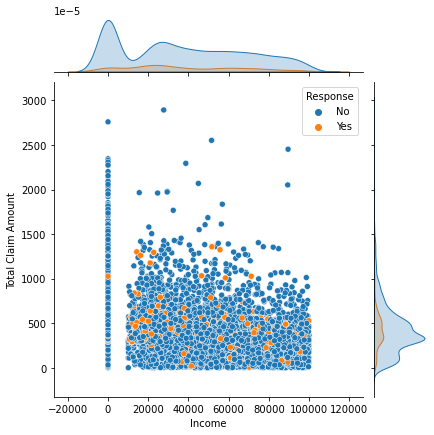

In [80]:
sns.jointplot(x=custmark['Income'], y=custmark['Total Claim Amount'], hue = custmark['Response'])

## Distribution plots

Looking at the distribution of the numerical variables we can say that:
- There is no normal distribution of any of the variables

We see that most distribution is skewed to the right:
- Most clients have no open complaints
- Most clients have a lower rather than higher income
- Most clients do not have more than one policy with the insurance company
- Most claims are below 1000 USD
- Total claims seem to have been decreasing over time

In [30]:
numerical = custmark._get_numeric_data()
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [39]:
categorical = custmark.select_dtypes(exclude=["number","bool_"])
categorical.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


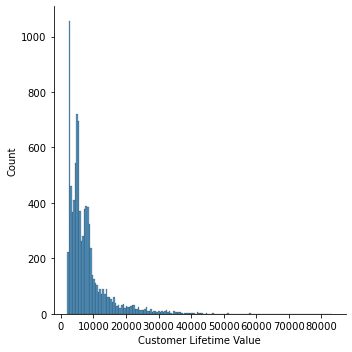

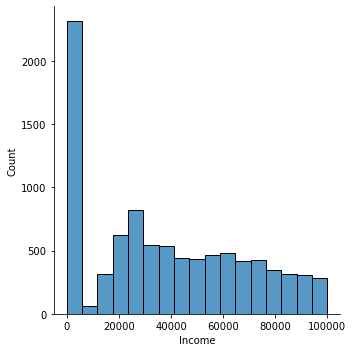

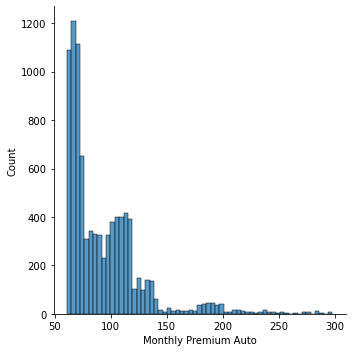

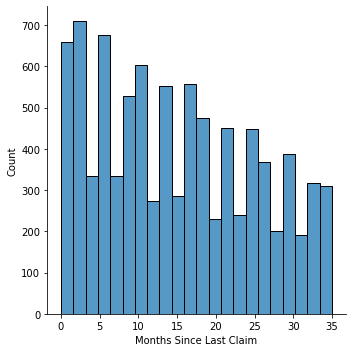

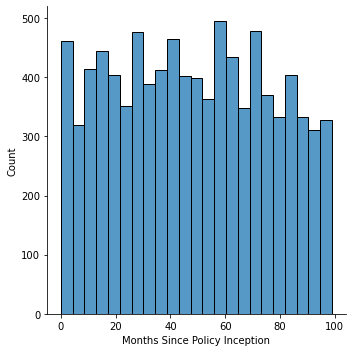

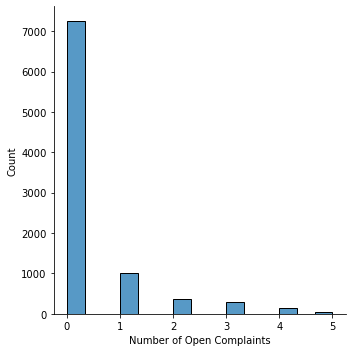

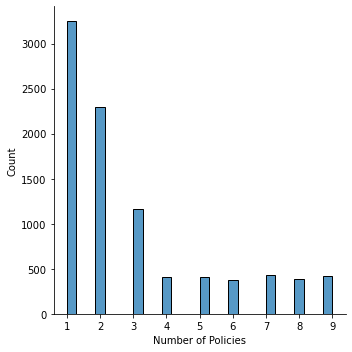

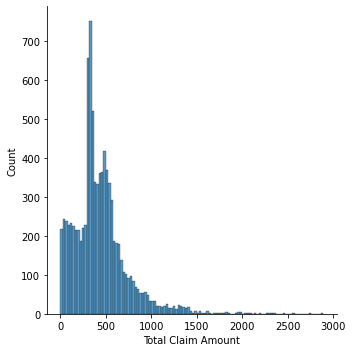

In [48]:
for column in numerical.columns:
    sns.displot(numerical[column])
    plt.show()

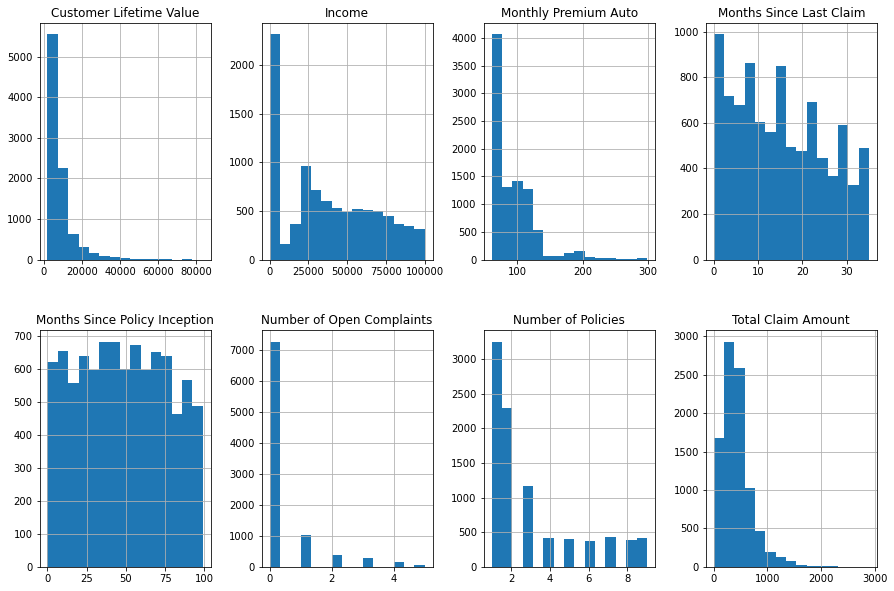

In [60]:
numerical.hist(bins=15, figsize=(15, 10), layout=(2, 4));

## Multicollinearity

Looking at the correlation between the variables there seems to be no high correlation (>0.9). Hence, we do not need to drop any of the columns. 

In [65]:
correlations_matrix = numerical.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


<AxesSubplot:>

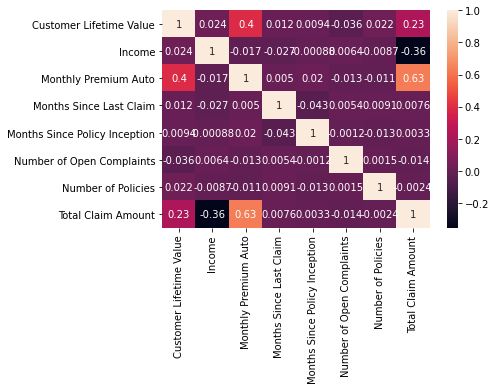

In [66]:
sns.heatmap(correlations_matrix, annot=True)